In [1]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/restaurant.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [4]:
df.shape

(9551, 21)

In [5]:
df.size

200571

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# Data Preprocessing
# Handling Missing Values
df['Cuisines'].fillna('Unknown', inplace=True)

# Encoding Categorical Variables
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])

In [8]:
# Feature Selection
features = ['Country Code', 'City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
            'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu',
            'Price range', 'Votes']
X = df[features]
y = df['Aggregate rating']

In [11]:
df.City.value_counts().head()

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Text(0.5, 1.0, 'Cuisines')

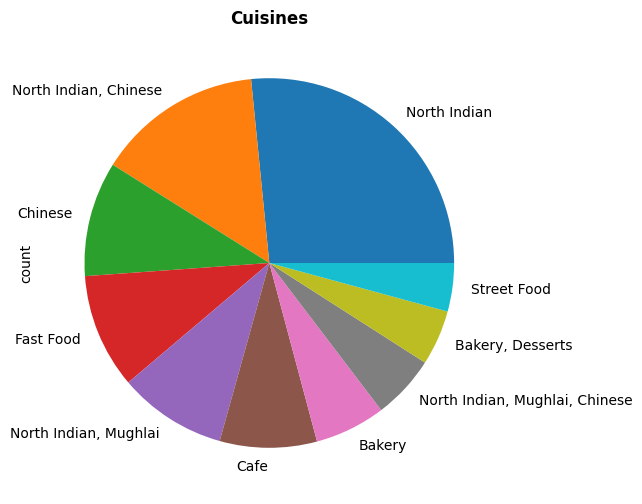

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df['Cuisines'].value_counts()[:10].plot(kind = 'pie')
plt.title('Cuisines', weight = 'bold')

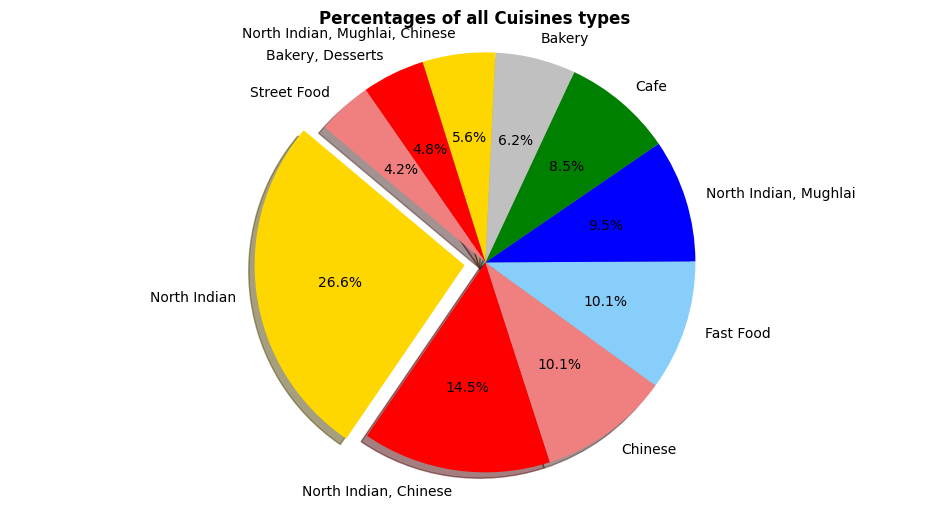

In [18]:
plt.figure(figsize = (12,6))
names = df['Cuisines'].value_counts()[:10].index
values = df['Cuisines'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentages of all Cuisines types", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Cuisines overall count')

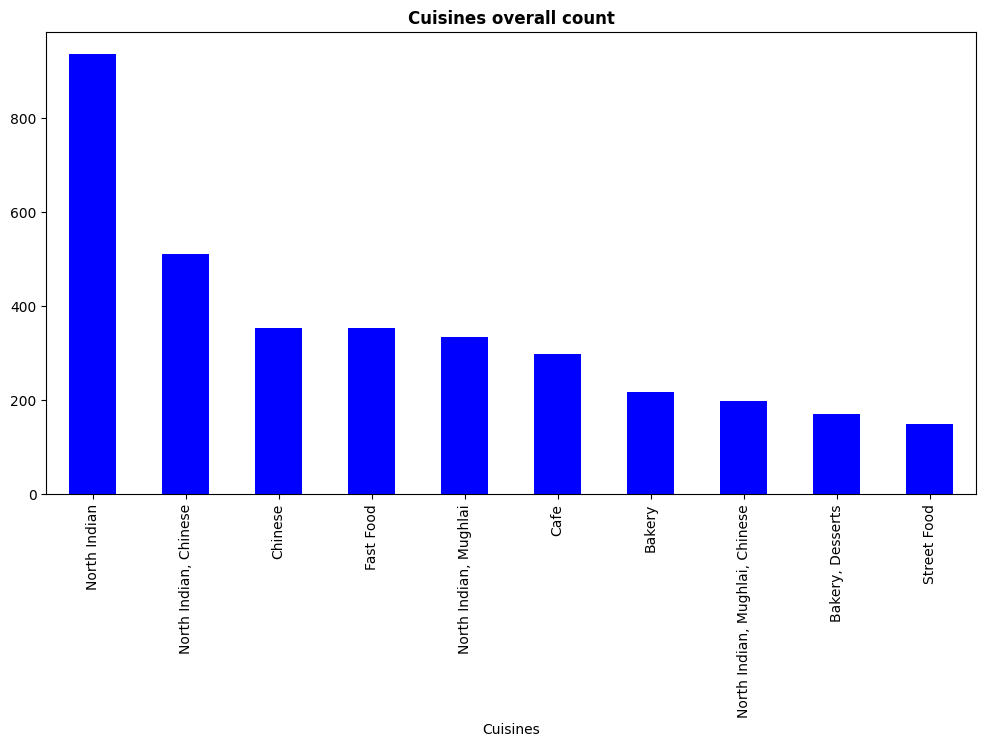

In [20]:
plt.figure(figsize = (12,6))
df['Cuisines'].value_counts()[:10].plot(kind = 'bar', color = 'b')
plt.title("Cuisines overall count", weight = 'bold')

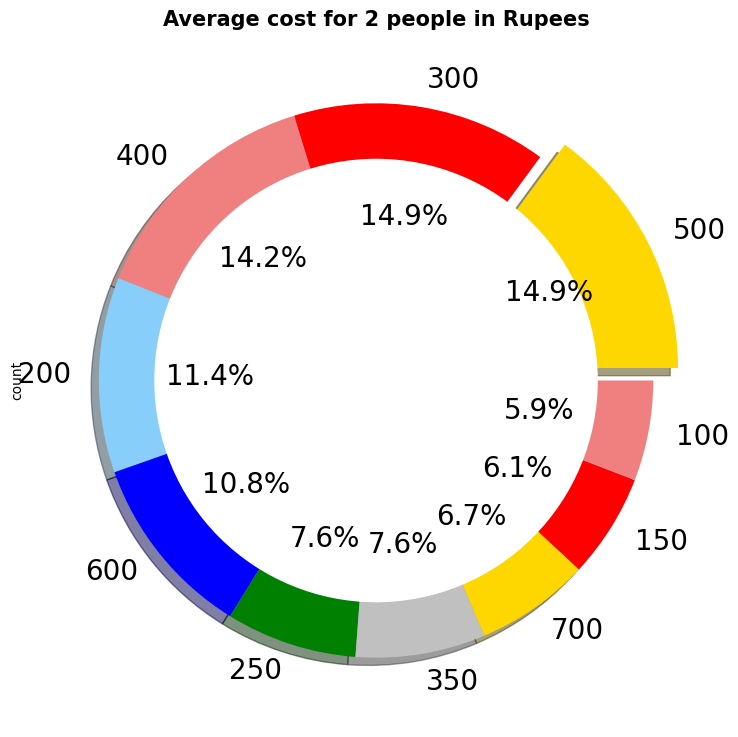

In [24]:
# Average cost for 2 people in Rupees
fig = plt.figure(figsize=(18, 9))

# The `explode` list should match the number of slices in the pie chart
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting the pie chart
delplot = df['Average Cost for two'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%',
                                                               fontsize=20, shadow=True,
                                                               explode=explode, colors=colors)

# Draw the circle to create a donut chart effect
centre_circle = plt.Circle((0,0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Setting the title
plt.title("Average cost for 2 people in Rupees", fontsize=15, weight='bold')

# Display the plot
plt.show()

In [9]:
# Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

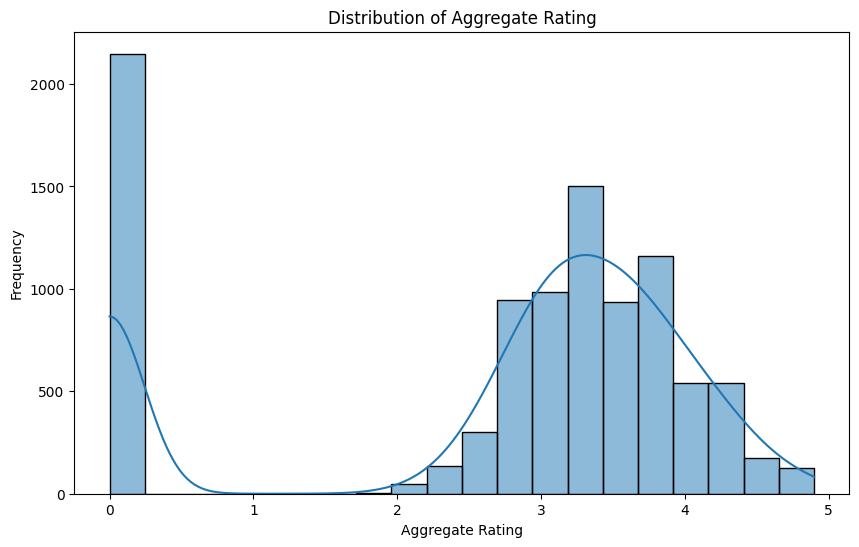

In [ ]:
# Data Visualizations

# Distribution of Aggregate Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-5512debd6291>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


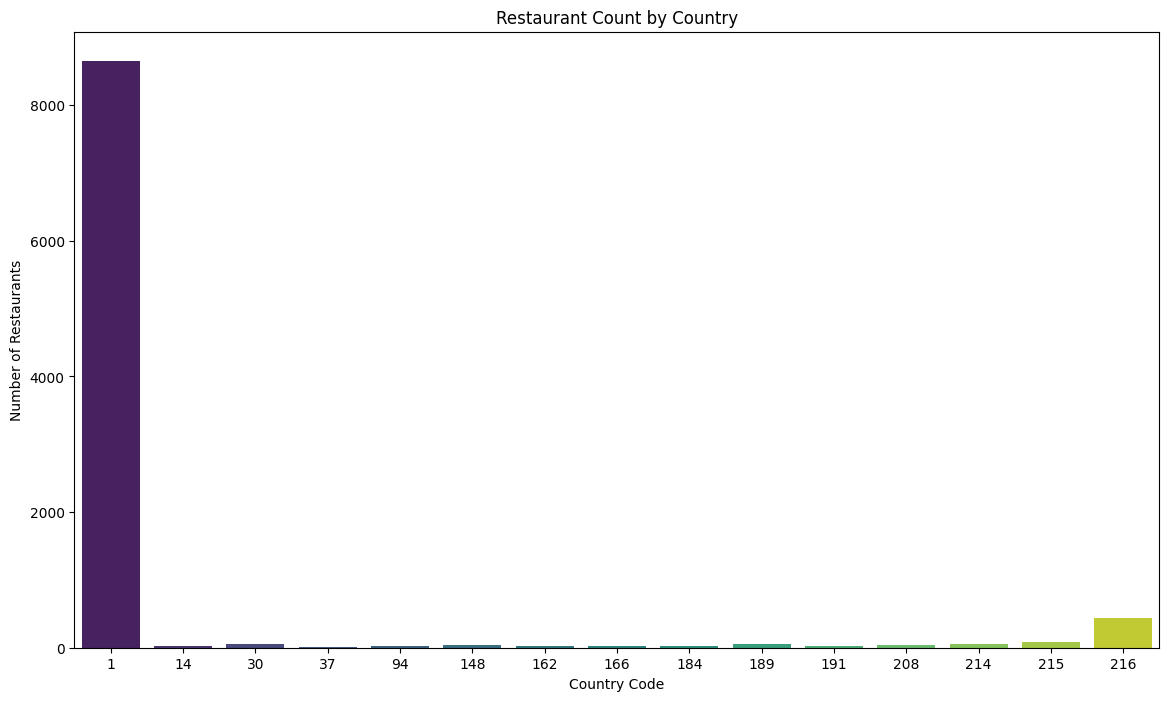

In [ ]:
# Restaurant Count by Country
plt.figure(figsize=(14, 8))
country_counts = df['Country Code'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Restaurant Count by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

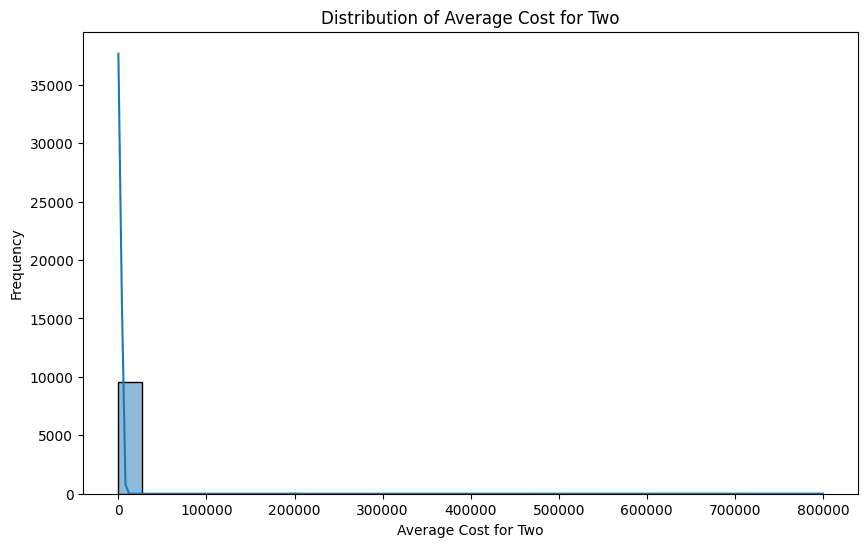

In [ ]:
#  Average Cost for Two Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-6006d9d2a8cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')


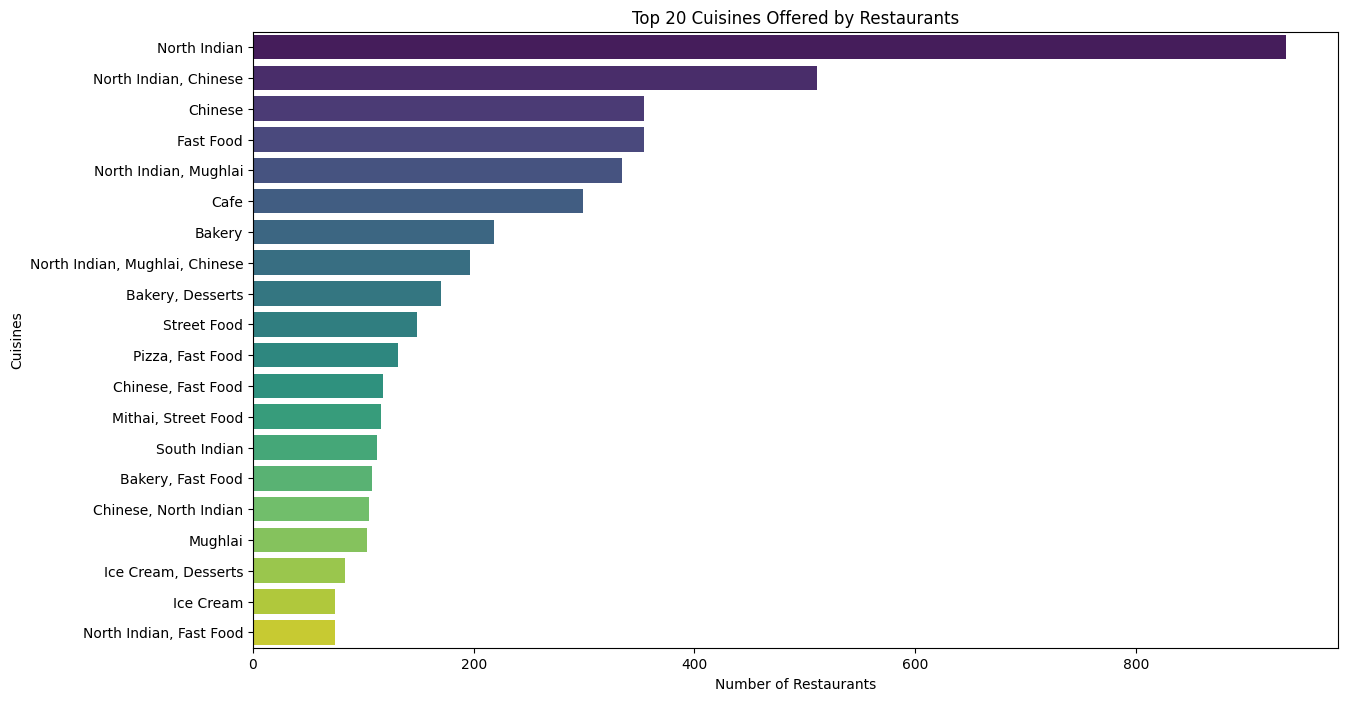

In [ ]:
# Cuisines Offered by Restaurants
plt.figure(figsize=(14, 8))
cuisine_counts = df['Cuisines'].value_counts().head(20)  # Top 20 cuisines
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')
plt.title('Top 20 Cuisines Offered by Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()

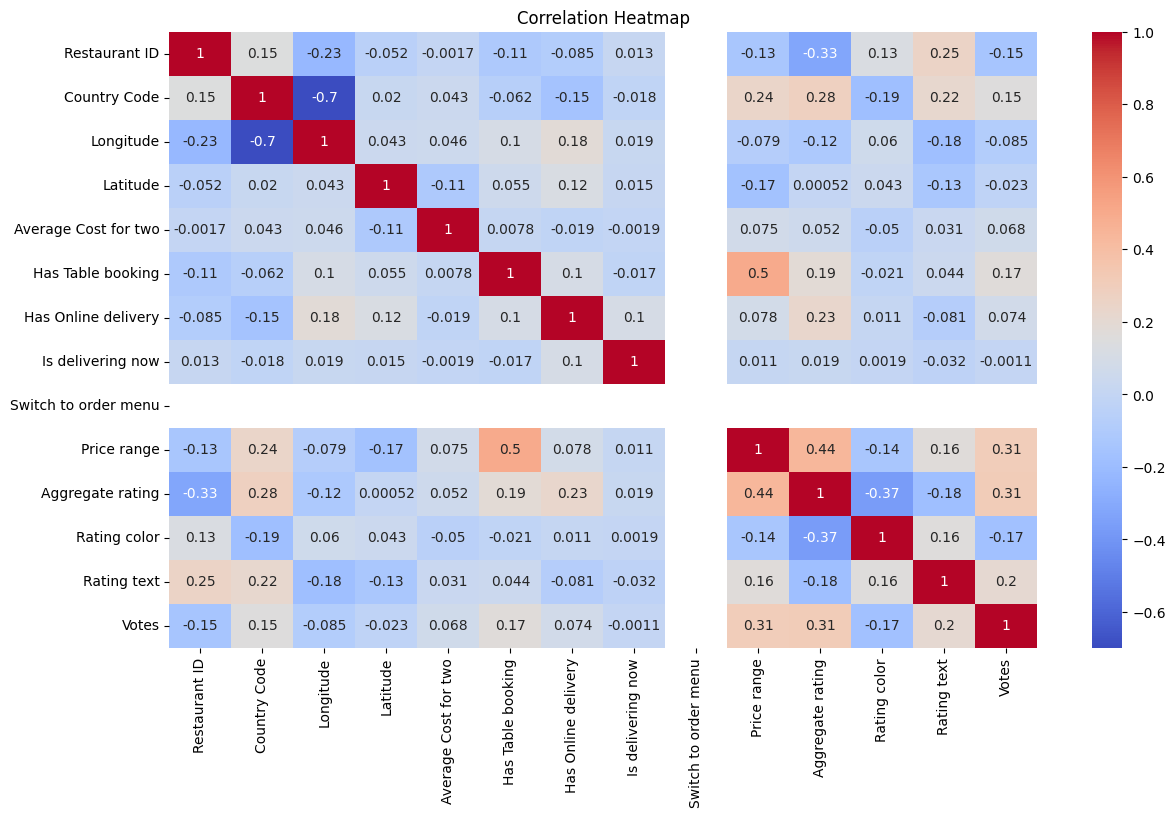

In [ ]:
# Ensuring Only Numeric Columns are Included
numeric_df = df.select_dtypes(include=[np.number])

# Create the Correlation Heatmap
plt.figure(figsize=(14, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Linear Regression model**

In [ ]:
# Feature Selection
features = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',
            'Is delivering now', 'Switch to order menu', 'Price range', 'Votes', 'City']

X = df[features]
y = df['Aggregate rating']

In [ ]:
# Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data Preprocessing
# Handling Missing Values
df['Cuisines'].fillna('Unknown', inplace=True)  # Handling missing values for 'Cuisines' as an example

# Encoding Categorical Variables
categorical_cols = ['City', 'Currency', 'Has Table booking', 'Has Online delivery',
                    'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
numeric_cols = ['Average Cost for two', 'Price range', 'Votes']

In [ ]:
# Creating transformers
numeric_features = ['Average Cost for two', 'Price range', 'Votes']
categorical_features = ['Has Table booking', 'Has Online delivery', 'Is delivering now',
                        'Switch to order menu', 'City']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Model Selection and Training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'City'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5074869577006722
R-squared: 0.33769122475295066


In [ ]:
# Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute with most frequent value for categorical variables
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Feature Selection
features = numeric_cols + categorical_cols
X = df[features]
y = df['Aggregate rating']

# Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Selection and Training
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

results = []
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Cross-validation
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_score = -cv_scores.mean()  # taking the mean of neg_mean_squared_error gives us mean squared error
    results.append((name, cv_score))
    # Training the model on the full training set
    model_pipeline.fit(X_train, y_train)
    # Evaluation on test set
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Decision Tree - Mean Squared Error: 0.05506775179964286, R-squared: 0.9758061885287157
Random Forest - Mean Squared Error: 0.0343569559592107, R-squared: 0.9849053994753831
Gradient Boosting - Mean Squared Error: 0.028448407373044472, R-squared: 0.9875012982707931


<ipython-input-45-b3c60d9bba5e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='viridis')


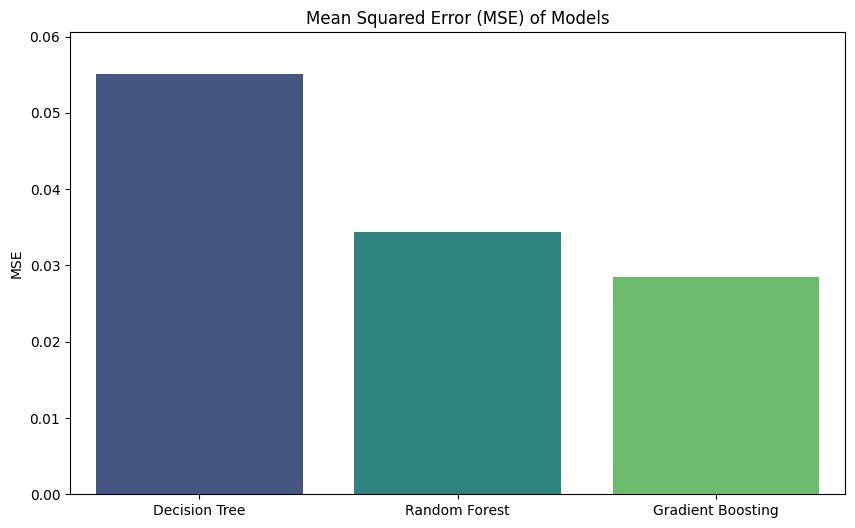

<ipython-input-45-b3c60d9bba5e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r_squared_scores, palette='plasma')


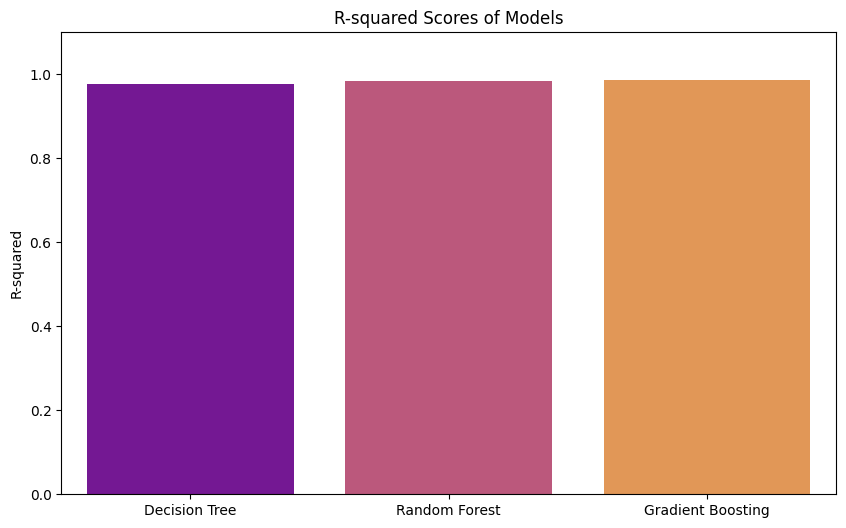

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and their metrics
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_scores
r_squared_scores
# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_scores, palette='viridis')
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_scores) * 1.1)
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r_squared_scores, palette='plasma')
plt.title('R-squared Scores of Models')
plt.ylabel('R-squared')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/restaurant.csv')

# Preprocessing
# Drop unnecessary columns for prediction (e.g., Restaurant ID, Restaurant Name, Address, etc.)
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Rating color', 'Rating text'], axis=1)

# Handling missing values
df['Cuisines'].fillna('Unknown', inplace=True)  # Fill missing values in Cuisines column

# Split features and target variable
X = df.drop(['Aggregate rating'], axis=1)
y = df['Aggregate rating']

# Define categorical and numerical features
categorical_features = ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
                        'Has Online delivery', 'Is delivering now', 'Switch to order menu']
numerical_features = ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    regressor = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    print("")

Model: Linear Regression
Mean Squared Error (MSE): 1.50
Mean Absolute Error (MAE): 0.87
R-squared (R2) Score: 0.3407

Model: Random Forest Regressor
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.19
R-squared (R2) Score: 0.9608

Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.21
R-squared (R2) Score: 0.9579

